In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
data = pd.read_csv("salaries.csv")
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


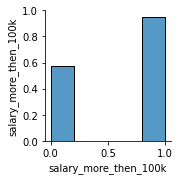

In [15]:
sns.pairplot(data=data)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
inputs = data
#Company
inputs['company'] = le.fit_transform(inputs['company'])
#job
inputs['job'] = le.fit_transform(inputs['job'])
#degree
inputs['degree'] = le.fit_transform(inputs['degree'])

inputs

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


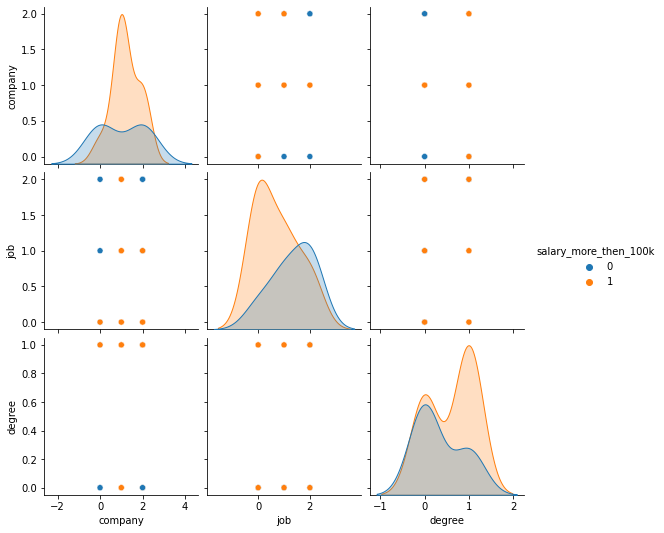

In [37]:
sns.pairplot(inputs, hue="salary_more_then_100k")

In [29]:
inputs = data.drop(['salary_more_then_100k'], axis=1)
target = data['salary_more_then_100k']


In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [26]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [27]:
model.score(inputs, target)

0.875

In [28]:
model.predict([[2,0]])

array([1], dtype=int64)

# Exercise

In [114]:
data = pd.read_csv("titanic.csv")
data.head()
data.drop(['PassengerId','Name','Ticket','SibSp','Embarked','Parch','Cabin'], axis = "columns", inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [96]:
data['Sex'] = (le.fit_transform(data['Sex'])).astype(int)
data.head()


,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [123]:
data.isnull().sum()
data['Age']=data['Age'].fillna(data['Age'].mean())
# inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2}) #ALternative way 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [98]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

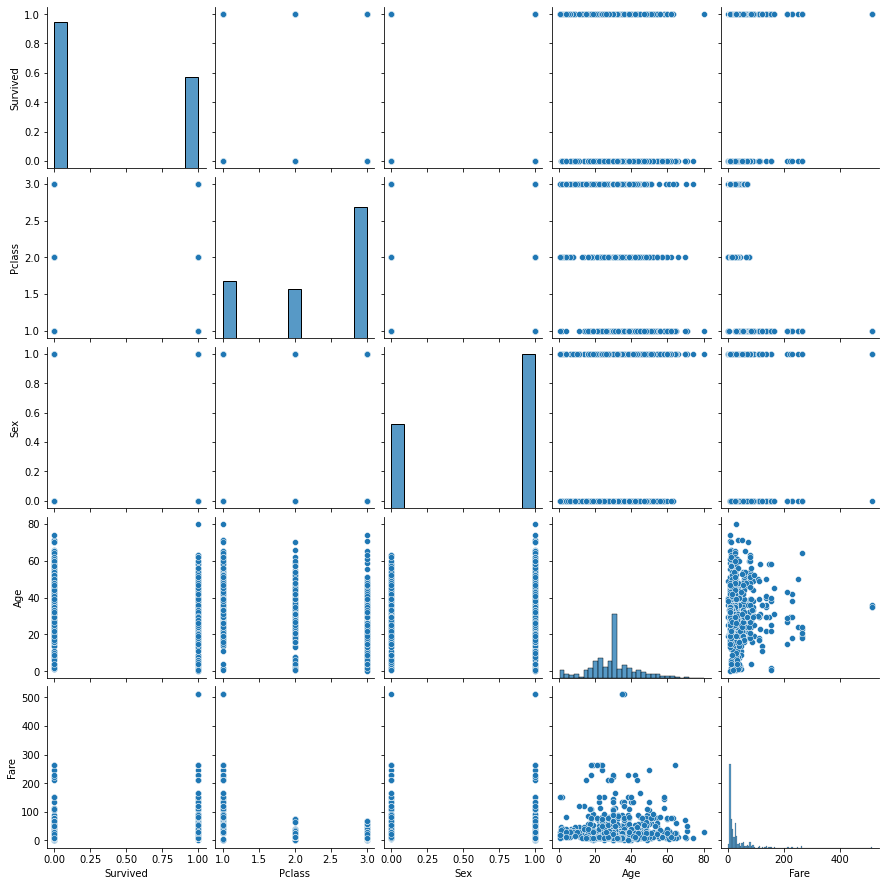

In [99]:
import seaborn as sns
sns.pairplot(data)

   Survived  Pclass  Sex   Age     Fare
0         0       3    1  22.0   7.2500
1         1       1    0  38.0  71.2833
2         1       3    0  26.0   7.9250
3         1       1    0  35.0  53.1000
4         0       3    1  35.0   8.0500


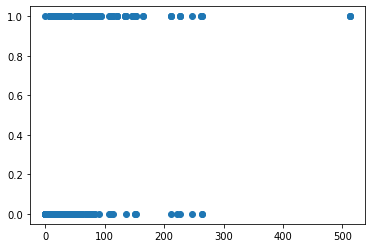

In [100]:
print(data.head())
plt.scatter(data.Fare,data.Survived)

In [101]:
inputs = data.drop(['Survived'], axis=1)
target = data['Survived']
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 24.4 KB


In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [120]:
len(x_train), len(x_test), len(y_train), len(y_test)

(712, 179, 712, 179)

In [102]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [121]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
model.score(x_test,y_test)

0.8100558659217877

In [112]:
model.predict([[1,1,53,500]])

array([1], dtype=int64)